# CS4320 - Introduction to Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 

**Please type your name and A number here:**

In [1]:
Name = "Riley May"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02242497"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

rubric={points:30}

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [3]:
# Insert your code here

spotify_df = pd.read_csv("data.csv", index_col = 0)

# spotify_df.tail()

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [4]:
# Do not modify this cell
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [5]:
# Insert your code here (You need to print the number of training and testing examples)

print("training size = " , df_train.size)
print("test size = ", df_test.size)

training size =  24192
test size =  8080


#### 1(c)
rubric={points:4}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [6]:
# Insert your code here
describe_df = df_train.describe()
describe_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.185337,0.617565,247606.240741,0.682022,0.139041,5.406746,0.189816,-7.089587,0.619048,0.090843,121.978905,3.964947,0.501758,0.511243
std,0.257866,0.163086,81841.143743,0.211498,0.279536,3.635880,0.154115,3.841885,0.485782,0.086574,27.121977,0.253555,0.246599,0.500039
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009460,0.512000,200072.000000,0.564000,0.000000,2.000000,0.092200,-8.389000,0.000000,0.037375,100.500750,4.000000,0.298750,0.000000
50%,0.063700,0.629500,230100.000000,0.713500,0.000076,6.000000,0.127000,-6.239000,1.000000,0.055050,121.974000,4.000000,0.501000,1.000000
75%,0.253000,0.738250,274041.750000,0.847250,0.061100,9.000000,0.243000,-4.756000,1.000000,0.107000,137.938250,4.000000,0.694000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
# Insert your code here

smallest_range = 1000
smallest_range_name = ""
# df_train.head()
for col in describe_df:
    col_df = df_train[col]  
#     print(col_df.max)
    colrange = col_df.max() - col_df.min()
    if colrange < smallest_range:
        smallest_range = colrange
        smallest_range_name = col

print(smallest_range_name)

speechiness


#### 1(d) 
rubric={points:12}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness  <img src="https://docs.google.com/uc?export=download&id=1aVT9lfAE0b6ju1aV3_gG_Dj5ZR2EJ-ri" alt="drawing" width="400"/>:



(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [8]:
# Do not modify the code  
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

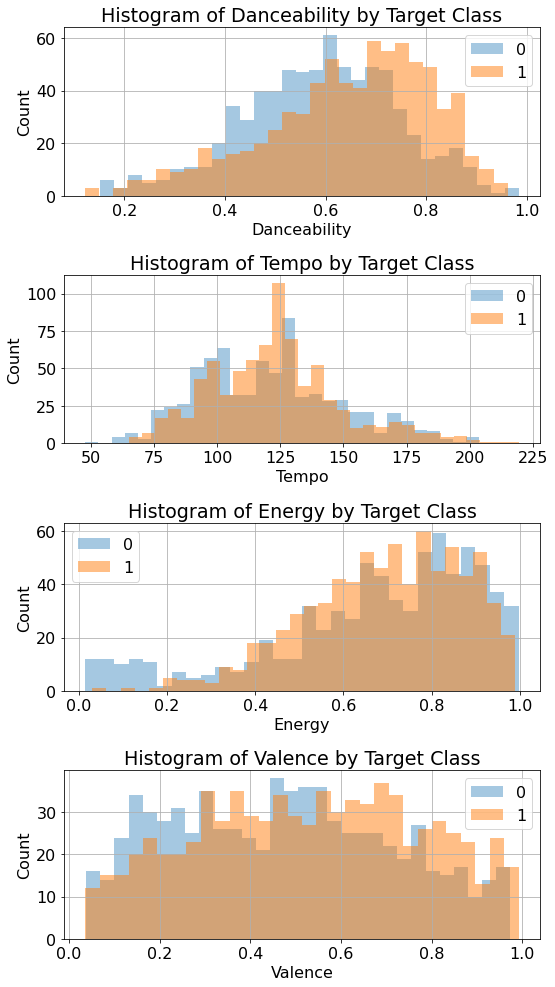

In [9]:
# Insert your code here

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(4, figsize=(8,14))

col = "danceability"
columns = ["danceability", "tempo", "energy", "valence"]
bin_num = 30

for i in range(len(columns)):
    col = columns[i]
    current_ax = ax[i]
    negative_examples.hist(ax = current_ax, column=col,label="0", bins = bin_num, alpha = .4)
    positive_examples.hist(ax = current_ax, column = col, label="1", bins =bin_num,alpha = .5 )
    current_ax.set_title("Histogram of " + col.capitalize() + " by Target Class")
    current_ax.set_xlabel(col.capitalize())
    current_ax.set_ylabel("Count")
    current_ax.legend()  

plt.show()


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Type your answer here:

I would use danceability of a song to predict whether a song is liked or not. 

A reasonable split to predict 0 if danceability < .7 (and 1 otherwise).

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Type your answer here:

If the depth of our decision tree is less than 1, then it would be completely useless.  However, the factors may be related in ways that we cannot see, so after making a decision with regard to one feature, another may provide more information to make out prediction more accurate.  


#### 1(g) 
rubric={points:4}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Type your answer here: 

Song title would not be helpful at all.

The artist could be helpful but it might be difficult making a decision tree or anything else. The artist would effect the probabilities of a song being liked, but some artists produce a variety of music. 


## Exercise 2: Using sklearn to build a decision tree classifier

Rubric={points:18}

#### 2(a) 
rubric={points:4}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [11]:
# Insert your code here: 

X_train = df_train.drop(columns =["target", "song_title", "artist"])

y_train = df_train["target"]


X_test = df_test.drop(columns =["target", "song_title", "artist"])

y_test = df_test["target"]

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [12]:
# Insert your code here:

predict = dt_clf.predict(X_train.iloc[[0]])

actual =  y_train.iloc[[0]]

actual_val = actual.tolist()

print("Prediction is " + str(predict) + " Actual  is " +  str(actual_val))
print("The prediction is correct")

Prediction is [0] Actual  is [0]
The prediction is correct


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [13]:
# Insert your code here


cross_val_score(dt_clf, X_train, y_train, cv=10)

array([0.65789474, 0.65789474, 0.68874172, 0.68211921, 0.64900662,
       0.67549669, 0.67549669, 0.69536424, 0.70198675, 0.72847682])

#### 2(d)
rubric={points:6}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [14]:
# Insert your code here
result = cross_validate(dt_clf, X_train, y_train, cv=10, return_train_score=True)

# print(result)
print("Test score =", result['test_score']," With average of ", np.average(result['test_score']) )
print("Training  score =", result['train_score'], " With average of ", np.average(result['train_score']))

Test score = [0.67105263 0.67105263 0.68874172 0.68211921 0.62913907 0.70198675
 0.66887417 0.62913907 0.70198675 0.7218543 ]  With average of  0.6765946322760544
Training  score = [0.99926471 1.         1.         0.99926525 0.99926525 0.99926525
 0.99926525 0.99926525 0.99926525 0.99926525]  With average of  0.9994121428880149


Type the answer of third question here:

The cross_validate score varies slighlty from the cross_val_score. After some reading on googling, I read that cross_val_score returns a  single metric, while cross_validate can return multiple metrics. But, what I think is happening here is slightly different folding of the two from the shuffling of the data. They have the same initial value, then they start to vary slightly.

#### 2(e)
rubric={points:2}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Type your answer here:

Yes, there are large differences between the training score and the cross-validation score. That is because the data is fitted to the training data, so it is going perform much better than on the test data which is where the cross-validation score comes from. 


#### 2(f)
rubric={points:2}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

Type your answer here:

I feel that the model is fairly trusth worthy. It doesn't appear to be overfitting the data which is good. The standard deviation is pretty low which is a good thing. 

In [15]:
result['test_score'].std()

0.028532654472869515

## Exercise 3: Hyperparameters 
rubric={points:32}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).{points:10}
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.{points:6}
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.{points:6}
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? {points:5}
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?{points:5}

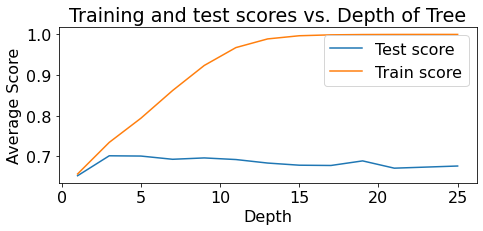

In [16]:
# Insert your code here
depth = []
train_score= []
test_score=[]

for i in range(1,26,2):
    dt_clf = DecisionTreeClassifier(max_depth = i)
    dt_clf.fit(X_train, y_train)
    result = cross_validate(dt_clf, X_train, y_train, cv=10, return_train_score=True)
    test = np.average(result['test_score']) 
    train = np.average(result['train_score']) 
    
    depth.append(i)
    test_score.append(test)
    train_score.append(train)

    
plt.plot(depth, test_score, label = "Test score")
plt.plot(depth, train_score, label= "Train score")
plt.legend()
plt.title("Training and test scores vs. Depth of Tree")
plt.xlabel("Depth")
plt.ylabel("Average Score")
plt.show()

In [17]:
print(depth)
print(test_score)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[0.6527710003485535, 0.7017035552457302, 0.701041303590101, 0.6931247821540606, 0.6964578250261415, 0.6924886720111537, 0.6838881143255489, 0.6786031718368769, 0.6779365632624608, 0.689177413733008, 0.6713227605437435, 0.6739630533286859, 0.6766077030324154]


Type your answer here:

As depth of the tree changes, we can see that the training score get remarkably better till it fits exactly to the data. However, that doesn't always help our test score. After about a depth of 4 we see that the accuracy starts to go down. that is why I would set the max tree depth to 4 becuase that appears to be in the middle of that peak.

I think that would be able to generalize most spotify datasets pretty well. A depth of 4 would in general be pretty good for most people. However, there will be outliers in the general population where people will only like an artist from one song, so they will probably require less depth for our decision tree.

## Exercise 4: Test set
rubric={points:12}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [18]:
# Insert your code here

max_depth = 4

# X_train = spotify_df.drop(columns =["target", "song_title", "artist"])
# y_train = spotify_df["target"]


dt_clf4 = DecisionTreeClassifier(max_depth=max_depth)

dt_clf4.fit(X_train, y_train)

result = cross_validate(dt_clf4, X_test, y_test, cv=10, return_train_score=True)

test = np.average(result['test_score']) 

print("Test score is =", test)

# print("Their score is =", dt_clf4.score(X_train, y_train))

Test score is = 0.6637254901960785


Type the answer of fourth question here:

The score from this exercise: 0.6617254901960784 on a given run

The score from exercise 2D: 0.6799146043917742

They are nearly the same score. It appears that the model is rather trustworthy. I didn't realize that the model would be that trustworthy. That is very good.

## Exercise 5: Conceptual questions
rubric={points:8}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Type your answer here:

1.   If the decision is if the value is less than 5.5: True, True, True, False, False, False

2.  5 / 6 

3. We cannot on this particular example unless we were to change a value. It cannot make the decision based off of one feature alone. 

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.